# **Utility Functions**

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import torch
from pathlib import Path
import os
import splitfolders
import seaborn as sns
import tensorflow as tf
import cv2
import itertools
import os.path
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, Flatten, Dropout, Dense, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

device = get_default_device()
device

device(type='cuda')

# **Binary Classification**

In [ ]:
!unzip -q "/content/drive/MyDrive/binary_data.zip" -d "/content/drive/MyDrive/binary_data"

In [ ]:
def split():
    data_dir = os.path.join('/content/drive/MyDrive/binary_data/data')
    print("No of images in each class of data directory")
    for dir, subdir, files in os.walk(data_dir):
        print(dir,':', str(len(files)))
        
    splitfolders.ratio("/content/drive/MyDrive/binary_data/data", output = "/content/drive/MyDrive/binary_data_folders", seed = 6, 
                       ratio = (0.8, 0.2), group_prefix = None, move = False)

In [ ]:
if os.path.exists("/content/drive/MyDrive/binary_data_folders"):
    print("Files already present in splitted format")
else:
    split()
    print("Files are splitted in the ratio 0.7, 0.1, 0.2")

Files already present in splitted format


In [ ]:
binary_train = "/content/drive/MyDrive/binary_data_folders/train"
binary_val = "/content/drive/MyDrive/binary_data_folders/val"

In [ ]:
width, height = 310, 310

In [ ]:
trainDataGen = ImageDataGenerator(rescale = 1./255, rotation_range = 5, zoom_range = 0.1)
validationDataGen = ImageDataGenerator(rescale = 1./255.)
train_generator = trainDataGen.flow_from_directory(binary_train, target_size = (width, height), batch_size = 2, class_mode = 'binary', shuffle = True)
val_generator = validationDataGen.flow_from_directory(binary_val, target_size = (width, height), batch_size = 1, class_mode = 'binary', shuffle = True)

Found 1292 images belonging to 2 classes.
Found 324 images belonging to 2 classes.


In [ ]:
binary_model = Sequential()
binary_model.add(Conv2D(32, (3, 3), input_shape = (width, height, 3), activation = 'relu'))
binary_model.add(MaxPooling2D(pool_size = (2, 2)))
binary_model.add(Dropout(0.2))

binary_model.add(Conv2D(64, (3, 3), activation = 'relu'))
binary_model.add(MaxPooling2D(pool_size = (2, 2)))
binary_model.add(Dropout(0.2))

binary_model.add(Conv2D(128, (3, 3), activation = 'relu'))
binary_model.add(MaxPooling2D(pool_size = (2, 2)))
binary_model.add(Dropout(0.2))

binary_model.add(Conv2D(128, (3, 3), activation = 'relu'))
binary_model.add(MaxPooling2D(pool_size = (2, 2)))
binary_model.add(Dropout(0.2))

binary_model.add(Flatten())
binary_model.add(Dropout(0.3))
binary_model.add(Dense(units = 512, activation = 'relu'))
binary_model.add(Dropout(0.3))
binary_model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
binary_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc']) 

In [ ]:
history = binary_model.fit(train_generator, epochs = 20, validation_data = val_generator)

Epoch 1/20
646/646 [==============================] - 235s 349ms/step - loss: 0.4812 - acc: 0.8669 - val_loss: 0.1300 - val_acc: 0.9537
Epoch 2/20
646/646 [==============================] - 34s 52ms/step - loss: 0.1621 - acc: 0.9420 - val_loss: 0.1130 - val_acc: 0.9691
Epoch 3/20
646/646 [==============================] - 34s 52ms/step - loss: 0.1791 - acc: 0.9427 - val_loss: 0.1828 - val_acc: 0.9383
Epoch 4/20
646/646 [==============================] - 34s 53ms/step - loss: 0.1460 - acc: 0.9543 - val_loss: 0.0933 - val_acc: 0.9722
Epoch 5/20
646/646 [==============================] - 34s 52ms/step - loss: 0.1028 - acc: 0.9528 - val_loss: 0.0973 - val_acc: 0.9630
Epoch 6/20
646/646 [==============================] - 34s 53ms/step - loss: 0.1144 - acc: 0.9659 - val_loss: 0.0723 - val_acc: 0.9722
Epoch 7/20
646/646 [==============================] - 34s 52ms/step - loss: 0.1069 - acc: 0.9628 - val_loss: 0.1326 - val_acc: 0.9506
Epoch 8/20
646/646 [==============================] - 34s 53

In [ ]:
binary_model.save("/content/drive/MyDrive/binary_model.hdf5")

# **Multiclass Classification**

In [ ]:
!unzip -q "/content/drive/MyDrive/data_categorised_rgb.zip" -d "/content/drive/MyDrive/multiclass_data"

In [ ]:
def split():
    data_dir = os.path.join('/content/drive/MyDrive/multiclass_data/data_categorised_rgb')
    print("No of images in each class of data directory")
    for dir, subdir, files in os.walk(data_dir):
        print(dir,':', str(len(files)))
        
    splitfolders.ratio("/content/drive/MyDrive/multiclass_data/data_categorised_rgb", 
                       output = "/content/drive/MyDrive/multiclass_data_folders", seed = 6, 
                       ratio = (0.8, 0.2), group_prefix = None, move = False)

In [ ]:
if os.path.exists("/content/drive/MyDrive/multiclass_data_folders"):
    print("Files already present in splitted format")
else:
    split()
    print("Files are splitted in the ratio 0.8, 0.2")

No of images in each class of data directory
/content/drive/MyDrive/multiclass_data/data_categorised_rgb : 0
/content/drive/MyDrive/multiclass_data/data_categorised_rgb/CS(40-50) : 396
/content/drive/MyDrive/multiclass_data/data_categorised_rgb/D(20-25) : 352
/content/drive/MyDrive/multiclass_data/data_categorised_rgb/DD(30-35) : 534
/content/drive/MyDrive/multiclass_data/data_categorised_rgb/SevereCS(55-65) : 257
/content/drive/MyDrive/multiclass_data/data_categorised_rgb/VSCS(70-90) : 305


Copying files: 1844 files [00:15, 118.87 files/s]

Files are splitted in the ratio 0.8, 0.2


In [ ]:
multiclass_train = '/content/drive/MyDrive/multiclass_data_folders/train'
multiclass_val = '/content/drive/MyDrive/multiclass_data_folders/val'

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1.0/255., rotation_range = 10)
train_generator = train_datagen.flow_from_directory(multiclass_train, batch_size = 2, class_mode = 'categorical', target_size = (310, 310), shuffle = True)
val_datagen = ImageDataGenerator(rescale = 1.0/255.) 
val_generator = val_datagen.flow_from_directory(multiclass_val, batch_size = 1, class_mode = 'categorical', target_size = (310, 310), shuffle = False)

Found 1473 images belonging to 5 classes.
Found 371 images belonging to 5 classes.


In [ ]:
multiclass_model = Sequential([
tf.keras.layers.Conv2D(32, (3, 3), input_shape = (310, 310, 3), activation = 'relu', name = 'Conv1'),
tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
tf.keras.layers.Dropout(0.2),

tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', name = 'Conv2'),
tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
tf.keras.layers.Dropout(0.2),

tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', name = 'Conv3'),
tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
tf.keras.layers.Dropout(0.2),

tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', name = 'Conv4'),
tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
tf.keras.layers.Dropout(0.2),

tf.keras.layers.Flatten(),

tf.keras.layers.Dropout(0.4),

tf.keras.layers.Dense(units = 512, activation = 'relu', name = 'FC1'),

tf.keras.layers.Dropout(0.3),

tf.keras.layers.Dense(5, activation = 'softmax', name = 'FC2')
])

In [ ]:
multiclass_model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
checkpointer = ModelCheckpoint(filepath = '/content/drive/MyDrive/multiclass.hdf5', monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_acc', factor = 0.05, patience = 7, min_lr = 0.00001)

In [ ]:
history = multiclass_model.fit(train_generator, epochs = 30, verbose = 1, validation_data = val_generator, callbacks = [reduce_lr, checkpointer])

Epoch 1/30
737/737 [==============================] - 53s 59ms/step - loss: 1.6023 - acc: 0.2749 - val_loss: 1.5967 - val_acc: 0.2884 - lr: 1.0000e-04
Epoch 2/30
737/737 [==============================] - 38s 51ms/step - loss: 1.5733 - acc: 0.2858 - val_loss: 1.5710 - val_acc: 0.3019 - lr: 1.0000e-04
Epoch 3/30
737/737 [==============================] - 38s 52ms/step - loss: 1.5257 - acc: 0.3204 - val_loss: 1.5610 - val_acc: 0.3396 - lr: 1.0000e-04
Epoch 4/30
737/737 [==============================] - 40s 55ms/step - loss: 1.4868 - acc: 0.3489 - val_loss: 1.5511 - val_acc: 0.3100 - lr: 1.0000e-04
Epoch 5/30
737/737 [==============================] - 38s 51ms/step - loss: 1.4374 - acc: 0.3741 - val_loss: 1.5623 - val_acc: 0.3154 - lr: 1.0000e-04
Epoch 6/30
737/737 [==============================] - 38s 52ms/step - loss: 1.3972 - acc: 0.4005 - val_loss: 1.5111 - val_acc: 0.3666 - lr: 1.0000e-04
Epoch 7/30
737/737 [==============================] - 39s 53ms/step - loss: 1.3539 - acc: 0.42

In [ ]:
multiclass_model.save('/content/drive/MyDrive/multiclass_model.hdf5')

# **Detection**

In [ ]:
from PIL import Image

In [ ]:
labels = open('/content/drive/MyDrive/yolo_custom_model_training/custom_data/classes.names').read().strip().split('\n')
weights_path = '/content/drive/MyDrive/yolov3_custom_final.weights'
configuration_path = '/content/drive/MyDrive/yolov3_custom.cfg'
probability_minimum = 0.3
threshold = 0.3
network = cv2.dnn.readNetFromDarknet(configuration_path, weights_path)
layers_names_output = ['yolo_82', 'yolo_94', 'yolo_106']

In [ ]:
def yolov3(img_path):
    image_input = cv2.imread(img_path)
    image_input_shape = image_input.shape
    plt.rcParams['figure.figsize'] = (10.0, 10.0)
    blob = cv2.dnn.blobFromImage(image_input, 1 / 255.0, (416, 416), swapRB = True, crop = False)
    blob_to_show = blob[0, :, :, :].transpose(1, 2, 0)
    network.setInput(blob)
    output_from_network = network.forward(layers_names_output)
    np.random.seed(42)
    colours = np.random.randint(0, 255, size=(len(labels), 3), dtype='uint8')
    bounding_boxes = []
    confidences = []
    class_numbers = []
    h, w = image_input_shape[:2]
    for result in output_from_network:
        for detection in result:
            scores = detection[5:]
            class_current = np.argmax(scores)
            confidence_current = scores[class_current]
            if confidence_current > probability_minimum:
                box_current = detection[0:4] * np.array([w, h, w, h])
                x_center, y_center, box_width, box_height = box_current.astype('int')
                x_min = int(x_center - (box_width / 2))
                y_min = int(y_center - (box_height / 2))
                bounding_boxes.append([x_min, y_min, int(box_width), int(box_height)])
                confidences.append(float(confidence_current))
                class_numbers.append(class_current)
    results = cv2.dnn.NMSBoxes(bounding_boxes, confidences, probability_minimum, threshold)
    global r
    r = results
    if len(results) > 0 and results is not None:
        for i in results.flatten():
            x_min, y_min = bounding_boxes[i][0], bounding_boxes[i][1]
            box_width, box_height = bounding_boxes[i][2], bounding_boxes[i][3]
            colour_box_current = [int(j) for j in colours[class_numbers[i]]]
            cv2.rectangle(image_input, (x_min, y_min), (x_min + box_width, y_min + box_height), colour_box_current, 5)
            text_box_current = '{}: {:.4f}'.format(labels[int(class_numbers[i])], confidences[i])
            cv2.putText(image_input, text_box_current, (x_min, y_min - 7), cv2.FONT_HERSHEY_PLAIN, 0.9, colour_box_current, 1)

        crop_img = image_input[y_min:y_min+box_height, x_min:x_min + box_width]
        cv2.imwrite('/content/drive/MyDrive/result.jpg', crop_img)
    else:
      print('Cyclone not detected via yolov3')


    plt.rcParams['figure.figsize'] = (15.0, 15.0)
    plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
    plt.show()

# **Regression**

In [ ]:
!unzip -q "/content/drive/MyDrive/regression_data.zip" -d "/content/drive/MyDrive/regression_data"

In [ ]:
image_dir = Path("/content/drive/MyDrive/regression_data/regression_data")

In [ ]:
filepaths = pd.Series(list(image_dir.glob(r'**/*.jpg')), name='Filepath').astype(str)
intensity = pd.Series(filepaths.apply(lambda x: os.path.split(os.path.split(x)[0])[1]), name='Intensity').astype(np.int32)

images = pd.concat([filepaths, intensity], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [ ]:
images

,Filepath,Intensity
0,/content/drive/MyDrive/regression_data/regress...,35
1,/content/drive/MyDrive/regression_data/regress...,30
2,/content/drive/MyDrive/regression_data/regress...,25
3,/content/drive/MyDrive/regression_data/regress...,45
4,/content/drive/MyDrive/regression_data/regress...,50
...,...,...
1839,/content/drive/MyDrive/regression_data/regress...,50
1840,/content/drive/MyDrive/regression_data/regress...,25
1841,/content/drive/MyDrive/regression_data/regress...,65
1842,/content/drive/MyDrive/regression_data/regress...,30


In [ ]:
image_df = images.sample(1844, random_state = 1).reset_index(drop = True)
train_df, test_df = train_test_split(image_df, train_size = 0.99, shuffle = True, random_state = 1)

In [ ]:
train_generator = ImageDataGenerator(rescale = 1./255, rotation_range = 5, validation_split = 0.2)
test_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_df

,Filepath,Intensity
1422,/content/drive/MyDrive/regression_data/regress...,30
1472,/content/drive/MyDrive/regression_data/regress...,45
1460,/content/drive/MyDrive/regression_data/regress...,45
301,/content/drive/MyDrive/regression_data/regress...,25
893,/content/drive/MyDrive/regression_data/regress...,45
...,...,...
905,/content/drive/MyDrive/regression_data/regress...,35
1791,/content/drive/MyDrive/regression_data/regress...,45
1096,/content/drive/MyDrive/regression_data/regress...,40
235,/content/drive/MyDrive/regression_data/regress...,85


In [ ]:
width = 310
height = 310

In [ ]:
train_images = train_generator.flow_from_dataframe(dataframe = train_df, 
                                                   x_col = 'Filepath', y_col = 'Intensity', 
                                                   target_size = (width, height),
                                                   class_mode = 'raw', batch_size = 4, shuffle = True, subset = 'training')

val_images = train_generator.flow_from_dataframe(dataframe = train_df,
                                                 x_col = 'Filepath', y_col = 'Intensity',
                                                 target_size = (width, height),
                                                 class_mode='raw', batch_size = 4, shuffle = True, subset = 'validation')

test_images = test_generator.flow_from_dataframe(dataframe = test_df,
                                                 x_col = 'Filepath', y_col = 'Intensity',
                                                 target_size = (width, height),
                                                 class_mode = 'raw', batch_size = 4, shuffle = False)

Found 1460 validated image filenames.
Found 365 validated image filenames.
Found 19 validated image filenames.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (width, height, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dropout(0.3))

model.add(Dense(units = 512, activation = 'relu'))

model.add(Dropout(0.3))

model.add(Dense(1, activation = 'linear'))

In [ ]:
model.compile(optimizer = 'adam', loss = ['mse'])

history = model.fit(train_images, validation_data = val_images, epochs=100)

Epoch 1/100
365/365 [==============================] - 1576s 4s/step - loss: 514.1063 - val_loss: 562.2880
Epoch 2/100
365/365 [==============================] - 43s 118ms/step - loss: 450.1279 - val_loss: 422.6672
Epoch 3/100
365/365 [==============================] - 41s 113ms/step - loss: 445.6577 - val_loss: 440.9698
Epoch 4/100
365/365 [==============================] - 41s 114ms/step - loss: 435.2696 - val_loss: 392.5790
Epoch 5/100
365/365 [==============================] - 44s 121ms/step - loss: 418.0180 - val_loss: 397.2959
Epoch 6/100
365/365 [==============================] - 42s 114ms/step - loss: 400.2276 - val_loss: 416.1898
Epoch 7/100
365/365 [==============================] - 42s 115ms/step - loss: 378.5921 - val_loss: 381.5529
Epoch 8/100
365/365 [==============================] - 42s 115ms/step - loss: 368.1723 - val_loss: 364.0673
Epoch 9/100
365/365 [==============================] - 43s 117ms/step - loss: 366.5027 - val_loss: 359.5593
Epoch 10/100
365/365 [=======

In [ ]:
model.save("/content/drive/MyDrive/regression_model.hdf5")

# **Cascading**

In [ ]:
regression_model = load_model('/content/drive/MyDrive/regression_model.hdf5')
multiclass_model = load_model('/content/drive/MyDrive/multiclass_model.hdf5')
binary_model = load_model('/content/drive/MyDrive/binary_model.hdf5')

Please upload an image


Saving 20001225.09-50.jpg to 20001225.09-50.jpg
Image uploaded
[1.]
Uploaded image has a cyclone

Detecting cyclone in the image.........



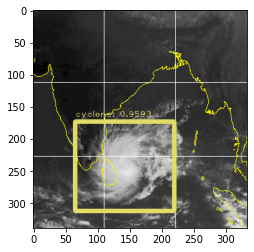


 Cropped image



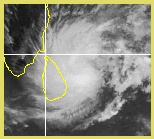


Predicted category of the cyclone in the image :- CS
88.74127

Predicted intensity of the cylone in the image :- 88


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image
print('Please upload an image')
uploaded = files.upload()

for fn in uploaded.keys():
  print('Image uploaded')
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(310, 310))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = binary_model.predict(images, batch_size = 10)
  print(classes[0])

  if classes[0]<0.5:
    print("Uploaded image doesn't have a cyclone")

  else:
    print('Uploaded image has a cyclone')
    print('\nDetecting cyclone in the image.........\n')
    yolov3(path)
    if len(r) > 0 and r is not None:
      print('\n Cropped image\n')
      from IPython.display import display, Image
      display(Image(filename = '/content/drive/MyDrive/result.jpg'))

      regression_prediction = np.squeeze(regression_model.predict(x))

      x = image.img_to_array(image.load_img('/content/drive/MyDrive/result.jpg', target_size=(310, 310)))
      x = np.expand_dims(x, axis=0)
      images = np.vstack([x])

      multiclass_prediction = multiclass_model.predict(x)
      output = {0: 'D', 1: 'DD', 2: 'CS', 3: 'SevereCS', 4: 'VSCS'}
      print('\nPredicted category of the cyclone in the image :-', output[np.argmax(multiclass_prediction)])

      #regression_prediction = np.squeeze(regression_model.predict(x))
      print('\nPredicted intensity of the cylone in the image :-', int(regression_prediction))
    
    else:
      multiclass_prediction = multiclass_model.predict(x)
      output = {0: 'D', 1: 'DD', 2: 'CS', 3: 'SevereCS', 4: 'VSCS'}
      print('\nPredicted intensity of the cyclone in the image :-', output[np.argmax(multiclass_prediction)])

**Another method**

A cyclone is present


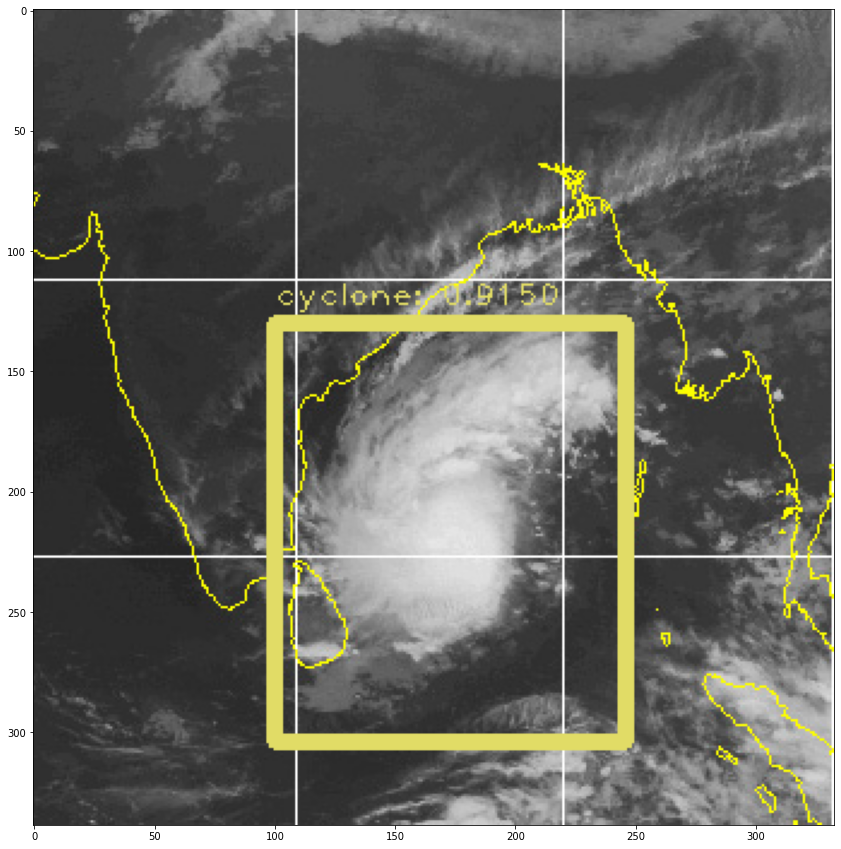

Predicted intensity :- D


In [ ]:
img_path = '/content/drive/MyDrive/binary_data_folders/test/yes/20001127.12-45.jpg'
img = image.load_img(img_path, target_size = (310, 310))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)
binary_prediction = binary_model.predict(img_preprocessed)
if binary_prediction > 0:
    print('A cyclone is present')
    yolov3(img_path)
    multiclass_prediction = multiclass_model.predict(img_preprocessed)
    output = {0: 'D', 1: 'DD', 2: 'CS', 3: 'SevereCS', 4: 'VSCS'}
    print('Predicted intensity :-', output[np.argmax(multiclass_prediction)])
else:
    print('No')